# Figure 1/2: Analysis & Figure Generation Code
#### Contents Description:
Contains analysis and code producing figures used in: 
Figure 1: I, J, K
Figure 2: B, C

#### Run Order
- Environment and Imports
- Config (paths, parameters)
- Load Data
- Process Data
- Figure 1 (I, J, K)
- Figure 2 (B, C)
- Save Figures and Tables

#### Environment & Imports Setup

In [1]:
from pathlib import Path
import os
import notebook_setup
info = notebook_setup.setup()
# Environment & Imports Setup
import matplotlib as matplotlib
use_code_ocean = True
if use_code_ocean:
    matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import pandas as pd
import random
import pingouin as png
import mat73
## set options
%matplotlib inline 
print(f"matplotlib {matplotlib.__version__} | Seaborn {sns.__version__}")
warnings.filterwarnings(action='ignore', category=FutureWarning)
pd.set_option('mode.use_inf_as_na', False) # pd.set_option('future.no_silent_downcasting', True)
#set seed for reproducibility 
np.random.seed(1)
random.seed(1)
# Apply mplstyle via absolute path from setup info
style_path = Path(info["function_py_storage"]) / "paper_plot.mplstyle"
print(f"Loading style guide at {style_path}")
if style_path.is_file():
    plt.style.use(str(style_path))
else:
    print(f"[warn] Style not found at: {style_path}")
here = info["repo_root"]
print(f" Here: {here}")
_plot_posthoc_src = os.path.join(here, 'plot_posthoc_test', 'src')
if os.path.isdir(_plot_posthoc_src) and _plot_posthoc_src not in sys.path:
    sys.path.append(_plot_posthoc_src)
#custom function import
import custom_module_imports as cmi 
from preprocess_data import hyper_param_dict
from helper_functions import save_fig_in_main_fig_dir,  save_plot_record_as_csv_txt, save_csv_to_analysis_storage
from ax_modifier_functions import set_ax_title_xlabel_ylabel, set_pointplot_edgecolor, set_labels
from sns_plotting_config import * #import dicts containing default plot params
from plot_posthoc_test.plot_stat_annotate import *
date_tag = "_".join([datetime.now().strftime('%d'),datetime.now().strftime('%h'),datetime.now().strftime('%Y')])

##Set/create save and load folder paths 
results_location = Path(here).parents[0] / "results"
data_location = Path(here).parents[0] / "data"
make_folder(results_location)
make_folder(data_location)
csv_folder_most_recent = results_location/ f"analysis_CSV_output/" #folders that analysis output goes to
make_folder( csv_folder_most_recent)
print(f"Saving results in {results_location}. Data location is {data_location}")

matplotlib 3.7.0 | Seaborn 0.12.1
Loading style guide at C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\code\Function .py Storage\paper_plot.mplstyle
 Here: C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\code
The folder 'C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results' already exists.
The folder 'C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\data' already exists.
The folder 'C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\analysis_CSV_output' has been created.
Saving results in C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results. Data location is C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\data


<Figure size 960x720 with 0 Axes>

#### Figure 1 Behavior Analysis

In [2]:
dataset_xls = pd.read_excel(data_location / "2024_Dlx Inscopix_Task Performance.xlsx", parse_dates = [2, 5,12,19], header = 0, dtype = str)
date_cols = [e for e in dataset_xls.columns if 'Date' in e]
dataset_xls = dataset_xls
dataset_xls['Age on Day 1-VEH'] = dataset_xls['Date run - VEH']- dataset_xls['DOB']
dataset_xls['Age on Day 2-CLNZ'] = dataset_xls['Date run - CLZ']- dataset_xls['DOB']
dataset_xls['Age on Day 3-postCLNZ'] = dataset_xls['Date run - POST']- dataset_xls['DOB']
##set param cols
str_to_drop = ["Cells", "DOB", "Date", ">", "<", 'Age-Run1']
numeric_cols_flag = ["IA", "RS", "Cells"]
metadata_col = [e for e in dataset_xls.columns if any(match_str in e for match_str in str_to_drop)] #return iterable element of dataset columns if said column contains any relevant substrign within the list of strings I include
print(metadata_col)
metadata_df = dataset_xls[metadata_col]
dataset_xls.drop(labels =metadata_col,axis = 1, inplace = True)
dataset_xls.replace(to_replace = "?", value = np.nan, inplace = True)
numeric_cols = [col for col in dataset_xls.columns if any(match_s in col for match_s in numeric_cols_flag)]
ID_cols = [col for col in dataset_xls.columns if any(match_str in col for match_str in ['ID', 'Geno', 'elapsed', 'Sex'])]
behav_cols =  [col for col in dataset_xls.columns if col not in ID_cols]
dataset_xls[numeric_cols] =dataset_xls[numeric_cols].apply(pd.to_numeric)
dataset_xls.sample()

['DOB', 'Age-Run1', 'Date run - VEH', 'Run1 - # Cells', 'RS TTC > IA TTC', 'Date run - CLZ', 'Run2 - # Cells', 'CLNZ RS TTC < VEH RS TTC', 'Date run - POST', 'Run3 # Cells']


,Mouse ID,Geno,Sex,IA_TTC_VEH,RS_TTC_VEH,IA_Errors_VEH,RS_Errors_VEH,IA_TTC_CLNZ,RS_TTC_CLNZ,IA_Errors_CLNZ,RS_Errors_CLNZ,IA_TTC_postCLNZ,RS_TTC_postCLNZ,IA_Errors_postCLNZ,RS_Errors_postCLNZ,Age on Day 1-VEH,Age on Day 2-CLNZ,Age on Day 3-postCLNZ
3,13-3,HET,F,15,31,3,11,15,13,4,2,11.0,21.0,0.0,7.0,106 days,107 days,120 days


import behavior df with info on perserverative vs random errors:

In [3]:
behav_detail_csv = 'Inscopix Mice Rules and Error types by session.xlsx'
behav_detail = pd.read_excel(data_location / behav_detail_csv, header = 0)
## merge
behavior_details_df = dataset_xls.merge(behav_detail.loc[:, ['Mouse ID'] + [x for x in behav_detail.columns if "Error" in x]], how = 'left', on = 'Mouse ID').drop([x for x in dataset_xls.columns if "Age" in x],axis = 1)
behav_long = behavior_details_df.melt(id_vars = ID_cols, var_name = 'Performance', value_name = 'measure').dropna(subset = 'measure')
## add description cols
behav_long['day']= behav_long.Performance.str.rpartition("_")[2] #get treatment_suffix
behav_long['data_type']=behav_long.Performance.str.split("_").str.get(1) #get measure_type
behav_long['Performance']=behav_long.Performance.str.rpartition("_")[0] #get rule + measure_type
behav_long['rule'] = behav_long.Performance.str.split("_").str.get(0) #get rule_prefix
behav_long['geno_day']= behav_long['Geno'].str.cat(behav_long['day'], sep = '_') .map({o:n for o,n in zip(["WT_VEH", "WT_CLNZ", "HET_VEH", "HET_CLNZ", "HET_postCLNZ"], geno_order_w_WT_CLNZ)})#clean up rough concat. with established label types
behav_long = behav_long.dropna().reset_index().drop('index', axis = 1)
print(behav_long.geno_day.unique())
behav_long.tail()

['Het VEH' 'WT VEH' 'Het CLNZ' 'WT CLNZ' 'Het postCLNZ']


,Mouse ID,Geno,Sex,Performance,measure,day,data_type,rule,geno_day
143,9-3,HET,F,Random_Error,1.0,postCLNZ,Error,Random,Het postCLNZ
144,13-3,HET,F,Random_Error,0.0,postCLNZ,Error,Random,Het postCLNZ
145,13-5,HET,M,Random_Error,0.0,postCLNZ,Error,Random,Het postCLNZ
146,13-8,HET,M,Random_Error,0.0,postCLNZ,Error,Random,Het postCLNZ
147,15-1,HET,M,Random_Error,1.0,postCLNZ,Error,Random,Het postCLNZ


#### Figure 1 I, J, K: IA and RS trials to completion, and perseverative errors 

With axis variable == Hue variable:
Saved 1_IA Performance_behav_posthoc MWU_28_Aug_2025.csv to C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\analysis_CSV_output
Output saved to C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\analysis_CSV_output\1_IA Performance_behav_posthoc_text_28_Aug_2025.txt
With axis variable == Hue variable:


Saved 1_RS Performance_behav_posthoc MWU_28_Aug_2025.csv to C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\analysis_CSV_output
Output saved to C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\analysis_CSV_output\1_RS Performance_behav_posthoc_text_28_Aug_2025.txt
With axis variable == Hue variable:


Saved 1_# Perseverative Errors_behav_posthoc MWU_28_Aug_2025.csv to C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\analysis_CSV_output
Output saved to C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\analysis_CSV_output\1_# Perseverative Errors_behav_posthoc_text_28_Aug_2025.txt
The folder 'C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\fig_1' has been created.
The folder 'C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\fig_1\28_Aug_2025' has been created.


Saved 1_IA_RS division_Dlx Inscopix Behavior by Genotype_behav_posthoc MWU_28_Aug_2025.csv to C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\analysis_CSV_output
Output saved to C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\analysis_CSV_output\1_IA_RS division_Dlx Inscopix Behavior by Genotype_behav_posthoc_text_28_Aug_2025.txt


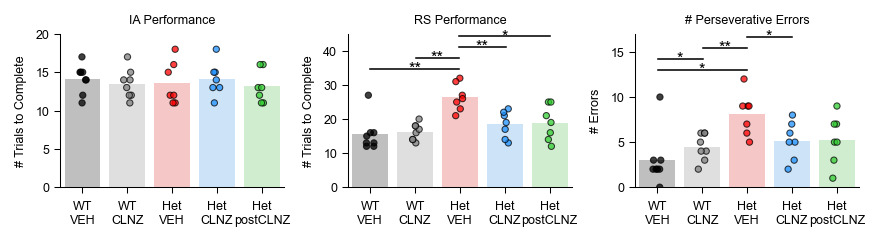

In [4]:
#parameters for figures
col_iter = ['IA_TTC', 'RS_TTC', 'Perseverative_Error']
titles = ["IA Performance", "RS Performance", "# Perseverative Errors"]
ylabels = ['# Trials to Complete', '# Trials to Complete', '# Errors']
plot_range_limit = {"IA_TTC": 20, "RS_TTC": 45, "Perseverative_Error": 17}
pairs_to_compare = [('WT VEH',  'Het VEH'),('WT VEH', 'WT CLNZ'), ('WT CLNZ',  'Het VEH'),  ('Het VEH', 'Het CLNZ'), ('Het VEH', 'Het postCLNZ')]
## Figure creation code 
fig, ax = plt.subplots(1, len(col_iter), figsize = (5.75,1.5), layout = 'constrained', gridspec_kw = {'wspace': 0.01})
behav_posthoc_list = []
## loop over all comparisons
for col_count, col_elem in enumerate(col_iter):## iterate over data types
    plot_mask = (behav_long['Performance'] == col_elem)
    plot_ax = ax[col_count]
    plot_params = {'data':behav_long.loc[plot_mask,:], 'x':'geno_day', 'y':'measure', 'order': geno_order_w_WT_CLNZ,
                   'hue':'geno_day', 'hue_order':geno_order_w_WT_CLNZ,'palette': color_list_WT_CLNZ,}
    sc = sns.barplot(ax = plot_ax, dodge = False,**plot_params, errorbar=None, linewidth = 1, alpha=0.25) 
    ax_title = f"{titles[col_count]}"
    set_ax_title_xlabel_ylabel(plot_ax, {'title': ax_title, 'legend_false': True, 'ylabel': f"{ylabels[col_count]}", 'xlim': [None, None],'ylim':[0, plot_range_limit[col_elem]], })
    #alter axis x ticks
    plot_ax.set_xticks(plot_ax.get_xticks());
    plot_ax.yaxis.get_major_locator().set_params(integer=True)
    ##NEW- plot scatter over
    sc = sns.stripplot(ax = plot_ax, dodge = False,**plot_params, alpha=0.75, s = 3,legend=False) 
    set_pointplot_edgecolor(plot_ax, edge_color = 'black', linewidth = marker_edge_width)
    #posthoc df- on stripplot
    posthoc_df = main_run_posthoc_tests_and_get_hue_loc_df(plot_ax, plot_params, sc, pairs_to_compare, test_name = 'MWU',ax_var_is_hue=True, detect_error_bar = False, plot_type = 'stripplot')
    plot_sig_bars_w_comp_df_tight(plot_ax, posthoc_df[posthoc_df['pvalue'] < 0.05], tight_offset = 0.06,offset_constant = 0.01,debug = False) #default_star_bbox_size = 0.045 #in ax fraction, determined empirically
    behav_posthoc_list.append(posthoc_df.assign(numeric_var=col_elem))#store posthoc comparison
    set_ax_title_xlabel_ylabel(plot_ax, {'xlabel':  None,})
    plot_ax.set_xticklabels([x.get_text().replace(" ", "\n") for x in plot_ax.get_xticklabels()])
    #save each sub component as own CSV
    save_plot_record_as_csv_txt(posthoc_df.assign(numeric_var=col_elem),folder_pref:="1",ax_title,csv_folder_most_recent, None, csv_suffix="behav_posthoc MWU",txt_suffix="behav_posthoc_text")
#save figs 
fig_name ="IA_RS division_Dlx Inscopix Behavior by Genotype"
save_fig_in_main_fig_dir(fig, fig_name= fig_name, folder_key=1, filetypes_to_save = ['png', 'pdf', 'svg'])
behav_posthoc_df = pd.concat(behav_posthoc_list, axis = 0)
save_plot_record_as_csv_txt(behav_posthoc_df,folder_pref:="1",fig_name,csv_folder_most_recent, None, csv_suffix="behav_posthoc MWU",txt_suffix="behav_posthoc_text")

#### Figure 1I,J,K ANOVAs on IA/RS TTC & Persev. Errors

In [5]:
#stats on groups- perseverative errors
comparison_iters = ['IA_TTC', 'RS_TTC', 'Perseverative_Error']
mask = behav_long['Performance'] == comparison_iters[2]
perseverative_error_anova = png.anova(data = behav_long.loc[mask,:], between = ['Geno', 'day'], dv = 'measure', detailed = True)
##save perseverative anova
csv_name = f"1_behavior_perseverative_error_anova_{date_tag}.csv"
save_csv_to_analysis_storage(perseverative_error_anova, csv_name, csv_folder_most_recent, None)
perseverative_error_anova

Saved 1_behavior_perseverative_error_anova_28_Aug_2025.csv to C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\analysis_CSV_output


,Source,SS,DF,MS,F,p-unc,np2
0,Geno,237.370507,1.0,237.370507,41.932960,2.759452e-07,0.567175
1,day,215.608602,2.0,107.804301,19.044293,3.564863e-06,0.543435
2,Geno * day,58.486636,2.0,29.243318,5.166012,1.136829e-02,0.244071
3,Residual,181.142857,32.0,5.660714,NaN,NaN,NaN


In [6]:
#stats on groups- RS TTC
comparison_iters = ['IA_TTC', 'RS_TTC', 'Perseverative_Error']
mask = behav_long['Performance'] == comparison_iters[1]
RS_ttc_anova = png.anova(data = behav_long.loc[mask,:], between = ['Geno', 'day'], dv = 'measure', detailed = True)
csv_name = f"1_behavior_RS_ttc_anova_{date_tag}.csv"
save_csv_to_analysis_storage(RS_ttc_anova, csv_name, csv_folder_most_recent, None)
RS_ttc_anova

Saved 1_behavior_RS_ttc_anova_28_Aug_2025.csv to C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\analysis_CSV_output


,Source,SS,DF,MS,F,p-unc,np2
0,Geno,2262.917358,1.0,2262.917358,129.822894,8.481652e-13,0.802253
1,day,3628.193548,2.0,1814.096774,104.074191,9.879274e-15,0.866749
2,Geno * day,689.830261,2.0,344.915131,19.787678,2.547906e-06,0.552919
3,Residual,557.785714,32.0,17.430804,NaN,NaN,NaN


#### Additional Info: Number of correct/error trials present in early and late task stages

In [7]:
csv_name = f"Task Stage Trial count per Subject.csv"
num_stage_trials = pd.read_csv( data_location / csv_name)
num_stage_trials.tail()

,Unnamed: 0,name,task_phase_vec,count
199,199,9_3_HET_RS3,Late_RS,4
200,200,9_3_HET_RS3,Early_IA_Correct,3
201,201,9_3_HET_RS3,Early_RS_Correct,3
202,202,9_3_HET_RS3,Early_IA_Error,2
203,203,9_3_HET_RS3,Early_RS_Error,2


In [8]:
late_stage_trials = num_stage_trials[num_stage_trials.task_phase_vec.str.contains("Late")]
wide_late_trials= late_stage_trials.pivot_table(columns = 'task_phase_vec', values = 'count', index = 'name') 
print(f" % of total Late IA/RS Trials that are error: {100* np.abs(wide_late_trials - 5).sum()/wide_late_trials.sum()}")


 % of total Late IA/RS Trials that are error: task_phase_vec
Late_IA    1.744186
Late_RS    8.024691
dtype: float64


#### Additional info: Quantifying gender effects

The folder 'C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\supp_fig_1' has been created.


The folder 'C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\supp_fig_1\28_Aug_2025' has been created.


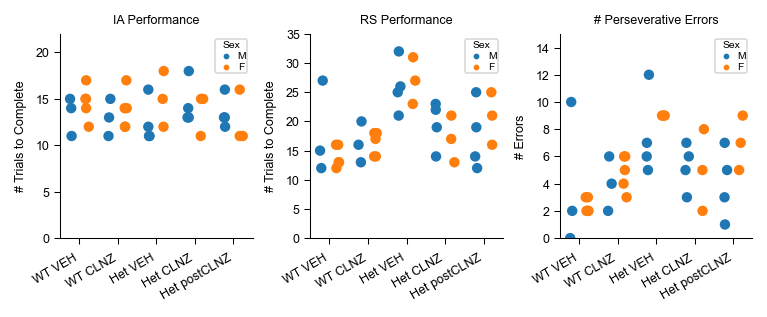

In [9]:
fig, ax_array = plt.subplots(1,3,figsize = (5,2), layout = 'constrained',sharex = False)
ylim_list = [[0,22], [0,35], [0,15]]
for n_plot, plot_type in enumerate(col_iter):
    plot_ax = ax_array[n_plot]
    plot_params = {'data':behav_long[behav_long.Performance == plot_type], 'x':'geno_day', 'y':'measure', 'order' : geno_order_w_WT_CLNZ, 'hue':'Sex', 'hue_order': ['M', 'F'], 'dodge':0.4}
    sc = sns.stripplot(ax = plot_ax, **plot_params, )
    set_ax_title_xlabel_ylabel(plot_ax, {'title': f"{titles[n_plot]}", 'xlabel':  None, 'ylabel': f"{ylabels[n_plot]}", 'ylim':ylim_list[n_plot], })
    plot_ax.set_xticks(plot_ax.get_xticks());
    plot_ax.set_xticklabels(plot_ax.get_xticklabels(), rotation = 30, ha="right")
    plot_ax.yaxis.get_major_locator().set_params(integer=True)
save_fig_in_main_fig_dir(fig,fig_name ="Supplementary Info- Male v Female IA RS TTC & Errors", folder_key='s_1', filetypes_to_save = ['png', 'svg'])

In [10]:
bhav = []
for section_name in behav_long.rule.unique():
    bhav.append(png.anova(data =  behav_long[behav_long.rule==section_name], dv = 'measure', between = ['geno_day', 'Sex']).assign(**{'section': section_name}))
sex_behavior_df = pd.concat(bhav)
csv_name =f"1_Geno_day x Sex Anova on behavior results_{date_tag}.csv"
save_csv_to_analysis_storage(sex_behavior_df, csv_name, csv_folder_most_recent, None)
sex_behavior_df

Saved 1_Geno_day x Sex Anova on behavior results_28_Aug_2025.csv to C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\analysis_CSV_output


,Source,SS,DF,MS,F,p-unc,np2,section
0,geno_day,5.137180,4.0,1.284295,0.256859,0.902908,0.036658,IA
1,Sex,3.162973,1.0,3.162973,0.632595,0.433342,0.022893,IA
2,geno_day * Sex,14.140598,4.0,3.535150,0.707030,0.594147,0.094814,IA
3,Residual,135.000000,27.0,5.000000,NaN,NaN,NaN,IA
0,geno_day,527.043767,4.0,131.760942,7.141753,0.000466,0.514100,RS
1,Sex,2.692054,1.0,2.692054,0.145916,0.705460,0.005375,RS
2,geno_day * Sex,56.960327,4.0,14.240082,0.771846,0.553047,0.102614,RS
3,Residual,498.133333,27.0,18.449383,NaN,NaN,NaN,RS
0,geno_day,106.723682,4.0,26.680920,4.625264,0.005653,0.406607,Perseverative
1,Sex,3.764200,1.0,3.764200,0.652542,0.426265,0.023598,Perseverative


#### Figure 2B: Visualize spatial weights of FOV using example post-procesed dataset 

In [11]:
## matlab loading specific modules
from matplotlib import patches
from matplotlib.collections import PatchCollection
import matplotlib.transforms as transforms
import matplotlib.lines as mlines
import logging

In [12]:
dataset_obj = data_location / f"13_4_WT_RS2.mat"
logging.disable(logging.ERROR) # Temporarily silence logging errors and warnings b.c. of string load 
try: 
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")  # This will ignore all warnings within this block     
        test_obj = mat73.loadmat(dataset_obj)
finally: 
    logging.disable(logging.NOTSET)
sample_dataset = test_obj['struct_dataset_object']
#extract good cells 
raw_dff = sample_dataset['C']
raster = sample_dataset['raster']
user_labels = sample_dataset['user_accepted_cells'] == 1 #1 is user label for 'good cell'
good_cells = sample_dataset['post_deduplication_cells'].astype(int) -1 #-1 to allow for matlab-python index. of the user accepted cells, which are kept after deduplication
sample_FOV = sample_dataset['output_struct']['spatial_weights'][:,:, user_labels] #get user label 1 IDs
sample_FOV = sample_dataset['output_struct']['spatial_weights'][:,:, good_cells] #get deduplicated cell IDs
mean_FOV = np.mean(sample_FOV, axis = 2)
## find which lines have active pixels, and only get those
active_xdim = np.sum(mean_FOV, axis = 1) >0
active_ydim =  np.sum(mean_FOV, axis = 0) >0
mean_FOV = mean_FOV[active_xdim,:] #only take active xdims
mean_FOV = mean_FOV[:,active_ydim] #only take active ydims

The folder 'C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\fig_2' has been created.
The folder 'C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\fig_2\28_Aug_2025' has been created.


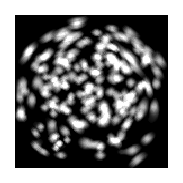

In [13]:
fig, ax = plt.subplots(figsize = (1.2,1.2), layout = 'tight')
sns.heatmap(mean_FOV, xticklabels = False, yticklabels = False, rasterized = True,cbar = False, ax = ax,vmax = 0.008, cmap = sns.color_palette("gray", as_cmap=True))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
save_fig_in_main_fig_dir(fig, fig_name ="Sample FOV_EXTRACT detected ROIs", folder_key=2, filetypes_to_save = ['png', 'svg', 'pdf'],bbox_inches="tight",pad_inches=0)

#### Figure 2C: Import dfF traces for subject, get only user_chosen + deduplicated, and plot

In [14]:
## load object of interest
dataset_obj = data_location / f"13_4_WT_RS2_spike_plot.mat"
test_obj = mat73.loadmat(dataset_obj)
mat_traces = test_obj['plot_info']
n_cells = mat_traces['zsig3'].shape[1]
#define subset of cells and frames to use 
n_cell = mat_traces['zsig3'].shape[1]
cell_pos = np.min(mat_traces['zsig3'], axis = 0)
frame_start = 1065
frame_end = 1140
cell_start = 3
cell_end= 9
## get/transform matrices to use 
cell_range = np.arange(cell_start,cell_end)
print(f" plot frames: {frame_start} to {frame_end}. plot cells: {cell_range}")
#determine spike locations
unique_y_vals = np.unique(mat_traces['y_to_plot'][0,:]).tolist()#get list of unique y positions for spikes (proxy for cell loc)
spike_is_at_y_val = {y_val: mat_traces['y_to_plot'][0,:]== y_val for y_val in unique_y_vals}
spike_x_loc_by_y_val = {key: mat_traces['x_to_plot'][0,val_bool] for key, val_bool in spike_is_at_y_val.items()}
trunc_spikes = {key:val  for count, (key, val) in enumerate(spike_x_loc_by_y_val.items()) if count in cell_range}
trunc_trace = {'zsig': mat_traces['zsig3'][frame_start*20:frame_end*20,cell_range],  'tvec': mat_traces['tvec'][(mat_traces['tvec'] <= frame_end)& (mat_traces['tvec']>  frame_start)]}

 plot frames: 1065 to 1140. plot cells: [3 4 5 6 7 8]


The folder 'C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\fig_1' already exists.


The folder 'C:\Users\13car\Dropbox\local_github_repos_personal\dlx56_mPFC_1p_SohalLab\results\fig_1\28_Aug_2025' already exists.


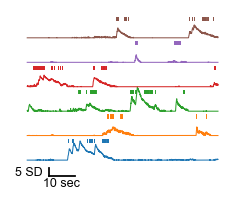

In [15]:
#set parameters for plot structure
scale_origin = (0.15,-5) # (x,y) of where scale lines intersect on figure (in ax fraction, data vals)
yscale_size = 5
yscale_label = f"{yscale_size} SD"
xscale_size = 10
xscale_label = f"{xscale_size} sec"
rec_width, rec_height = 0.1, 2.5 #size of spike marker
line_offset_factor = 0.1 #coef for multiplying to get more space between lines
      
fig,ax = plt.subplots(figsize = (1.5,1.25), layout = 'constrained')
##set at fig creation what explicit locations to keep
y_offset_to_keep = cell_pos[cell_range]
y_shift_trunc = y_offset_to_keep * line_offset_factor
trace_mat_shift = y_shift_trunc+ trunc_trace['zsig']#shift raw traces themselves
trace_min = np.min(trace_mat_shift)
## plot traces and spikes 
lines = ax.plot(trunc_trace['tvec'],trace_mat_shift-trace_min, linewidth=0.5)
patch_list, line_color_list = [],[] #store information from iteration for plotting later 
spike_unique_y_locs = list(trunc_spikes.keys())
for count, key in enumerate(spike_unique_y_locs):
    spike_y = key+ y_shift_trunc[count]-trace_min  #save for every entry of interest, offset by height vec  
    for spike_x in trunc_spikes[key]: #iterate through x values in current position
        if (spike_x < frame_end) & (spike_x > frame_start):
            poly = patches.Rectangle(xy = [spike_x,spike_y], width =rec_width,height = rec_height, zorder = 0,)
            patch_list.append(poly)
            line_color_list.append(lines[count].get_color())    
ax.add_collection(PatchCollection(patch_list, facecolor = line_color_list, alpha = 0.95, edgecolor = None)) # Add all patches to the plot with their respective colors
ax.set_yticks([])
ax.set_xticks([])
set_labels(ax, {'title': None, 'ylim': [-1, 90]})
ax.spines[['bottom', 'left']].set_visible(False)

## add scalebar
yscale_bounds = [scale_origin[1]-yscale_size,scale_origin[1]] 
#given data defined breadth of linescale , transform into ax coordinates to allow placing anywhere
y_scale = mlines.Line2D([scale_origin[0],scale_origin[0]],yscale_bounds,transform = ax.get_yaxis_transform(), clip_on = False, c= 'black')  #x is in ax_fraction, y is in data
#given ax fraction x, need to find location of ax_fraction x in data, then do data from there to accurately do x scale 
y_scalebar_loc_in_ax_frac =y_scale.get_xydata()#x is in ax_fraction, y is in data
axes_data_loc_to_display_transform = transforms.blended_transform_factory(ax.transAxes, ax.transData)#transform (x,y) = (axes,data) to (display,display)
y_scalebar_loc_in_display_pos = axes_data_loc_to_display_transform.transform(y_scalebar_loc_in_ax_frac)
y_scalebar_loc_in_data = ax.transData.inverted().transform(y_scalebar_loc_in_display_pos)
y_scalebar_len_data = np.diff(y_scalebar_loc_in_data,axis = 0)[0,1]
x_scale = mlines.Line2D([y_scalebar_loc_in_data[0,0],y_scalebar_loc_in_data[0,0]+xscale_size], [y_scalebar_loc_in_data[0,1],y_scalebar_loc_in_data[0,1]], clip_on = False, c= 'black')#xscale will be (yscalebar_xloc, yscalebar_xloc + xbar_width), (yscalebar_yloc_start,yscalebar_yloc_start)
ax.add_artist(y_scale)
ax.add_artist(x_scale)
x_label_offset_pos = ax.transData.inverted().transform(y_scalebar_loc_in_display_pos[0,:]*0.9) #move label 10% below where the scalebar is 
#make annotatiosn of bar
ax.text(x= y_scalebar_loc_in_data[0,0]+xscale_size*0.5, y = x_label_offset_pos[1], s = xscale_label,horizontalalignment = 'center', verticalalignment = 'top')
ax.text(x=x_label_offset_pos[0],y =np.mean(y_scalebar_loc_in_ax_frac,axis = 0)[1], s = yscale_label, horizontalalignment = 'right', verticalalignment = 'center')
# ## savefig
save_fig_in_main_fig_dir(fig, fig_name= "Cell subset- calcium trace example (spike vs dff) 60sec", folder_key=1, filetypes_to_save = ['png', 'pdf', 'svg'],bbox_inches="tight",pad_inches=0)